In [2]:
#importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Today we are exploring a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We do not have any personal health information such as the diagnostics,but we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.Let's look at our data.

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no missing values and the data is assigned the proper data types.We are primarily interested in the charges and suitable predictors, lets First Encode the Categorical Features 

In [5]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)


In [6]:
condition = [
    (df['bmi'] < 18.5),
    (df['bmi'] >= 18.5) & (df['bmi'] < 25),
    (df['bmi'] >=25 ) & (df['bmi']< 30),
    (df['bmi']>=30)
]
categories = ['UnderWeight','NormalWeight','OverWeight','Obese']
df['WeightClass'] = np.select(condition,categories)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,WeightClass
0,19,0,27.900,0,1,3,16884.92400,OverWeight
1,18,1,33.770,1,0,2,1725.55230,Obese
2,28,1,33.000,3,0,2,4449.46200,Obese
3,33,1,22.705,0,0,1,21984.47061,NormalWeight
4,32,1,28.880,0,0,1,3866.85520,OverWeight


In [8]:
corr = df.corr()
corr['charges'].sort_values()

C:\Users\izzys\AppData\Local\Temp\ipykernel_15136\3714990338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

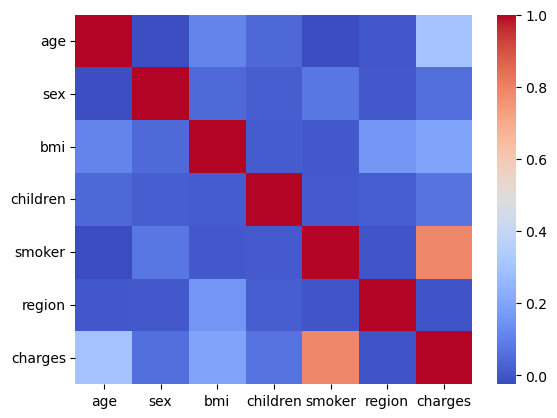

In [9]:
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_),cmap='coolwarm')

From this We can see that only Smoking has a significant Correlation with Charges

<Axes: xlabel='smoker', ylabel='charges'>

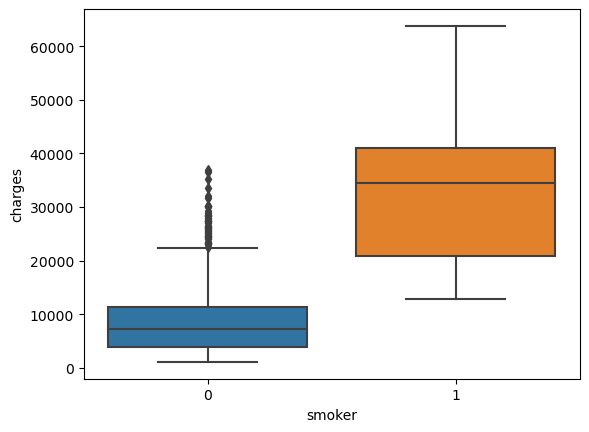

In [10]:
sns.boxplot(x=df['smoker'],y=df['charges'])

Previously we separated the data into different weight class we will like to see the relationship between that and Charges

Text(0.5, 1.0, 'total number of each Weight Class')

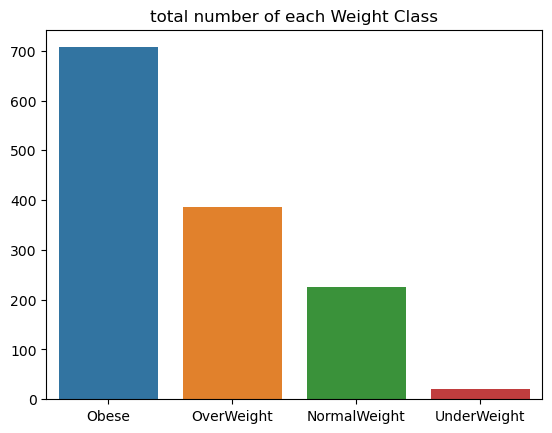

In [11]:
weight_counts = df['WeightClass'].value_counts()
sns.barplot(x=weight_counts.index,y=weight_counts.values)
plt.title('total number of each Weight Class')

We Can see that the majority of people are overweight let see if it has a big impact on health bill

<Axes: xlabel='WeightClass', ylabel='charges'>

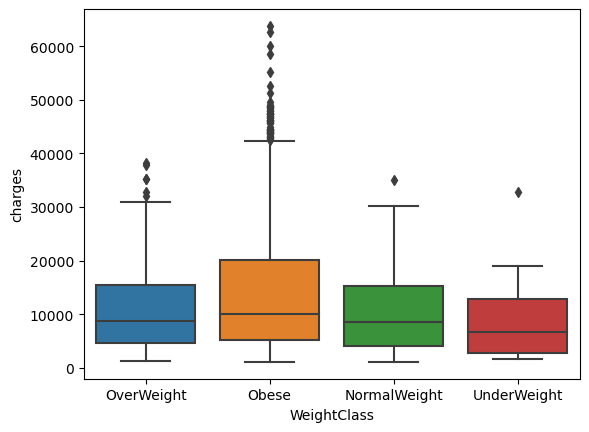

In [12]:
sns.boxplot(x=df['WeightClass'],y=df['charges'])

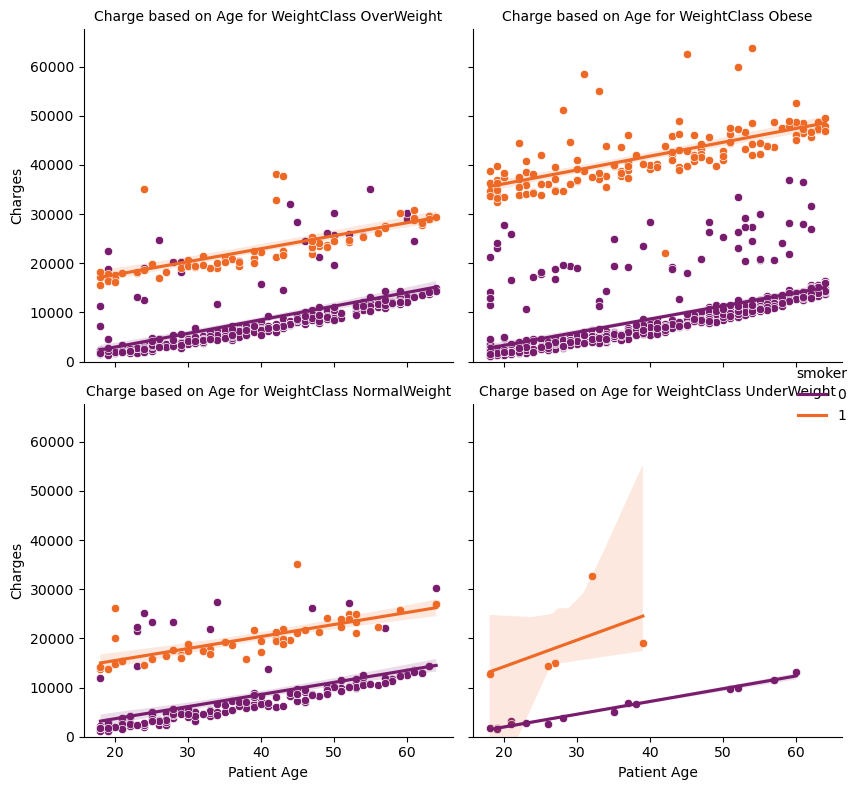

In [26]:

# Create a FacetGrid with scatter plots for each weightClass
g = sns.FacetGrid(df, col="WeightClass", hue="smoker",palette='inferno' ,col_wrap=2, height=4)
g.map_dataframe(sns.scatterplot, x='age', y='charges',)
g.map_dataframe(sns.regplot, x='age', y='charges', scatter=False)
g.add_legend()
g.set(ylim=(0, None))
# Set titles and labels
g.set_titles("Charge based on Age for WeightClass {col_name}")
g.set_axis_labels("Patient Age", "Charges")

# Adjust spacing between subplots
plt.tight_layout()

we can see that the biggest effect is whether the person smokes or not.
We also see that when the person smokes the cost is generally higher for people in the obese weight class 

Lets see whether sex plays a big deal in the Bill

Text(0.5, 1.0, 'The relationship between age and insurance bill')

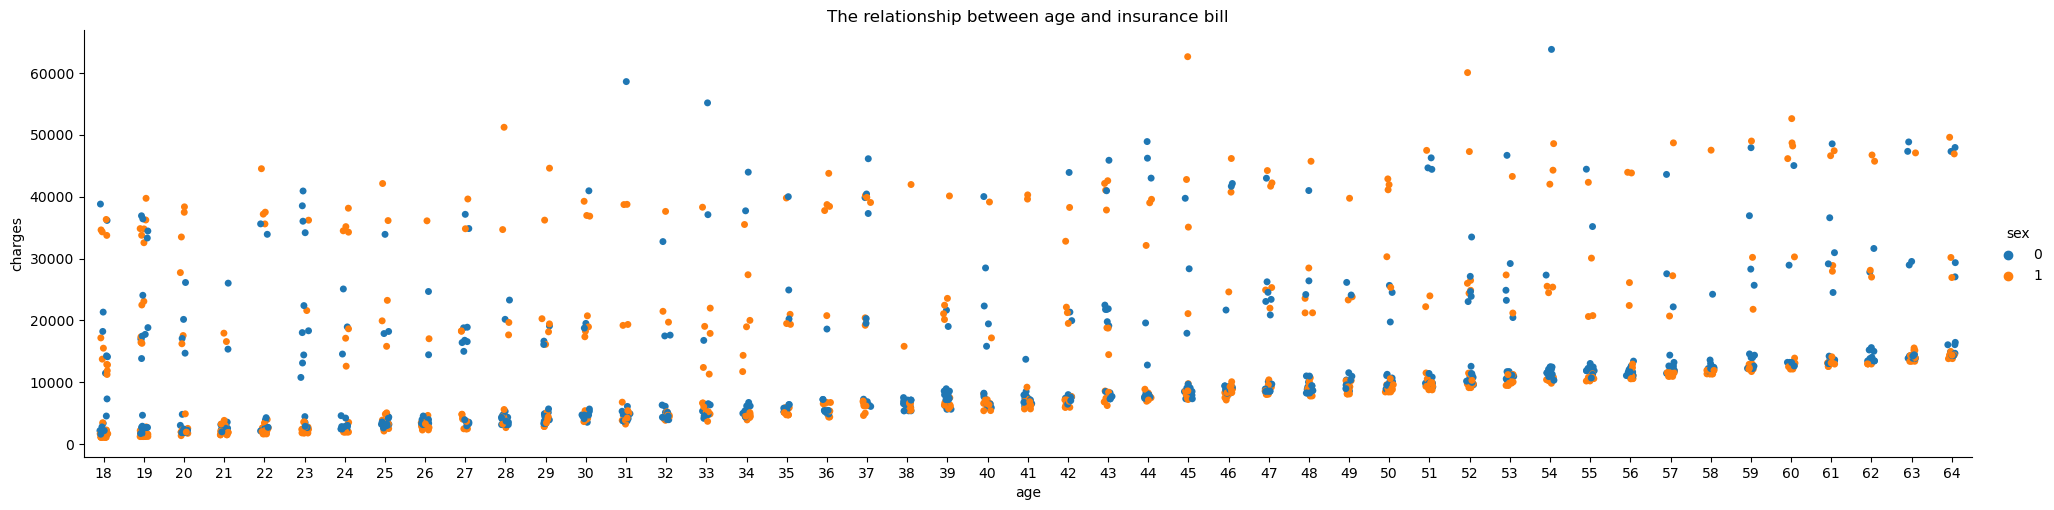

In [14]:
sns.catplot(df,x='age',y='charges',hue='sex',aspect=4)
plt.title('The relationship between age and insurance bill')

Sex doesn't have any significant effect on the insurance bill 

lets check the effect of children 

<Axes: >

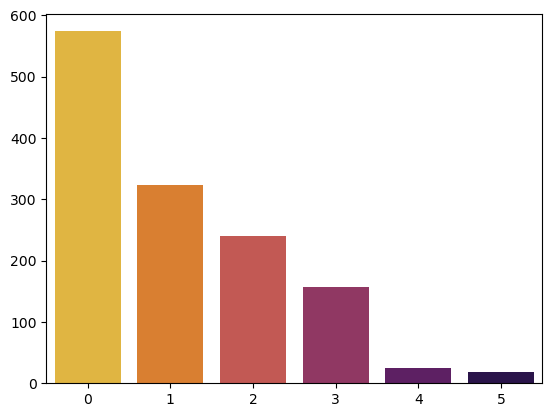

In [15]:
children_count = df['children'].value_counts()
sns.barplot(x=children_count.index,y=children_count.values,palette='inferno_r')

Text(0.5, 1.0, 'number of children a person has and their likelihood to smoke.')

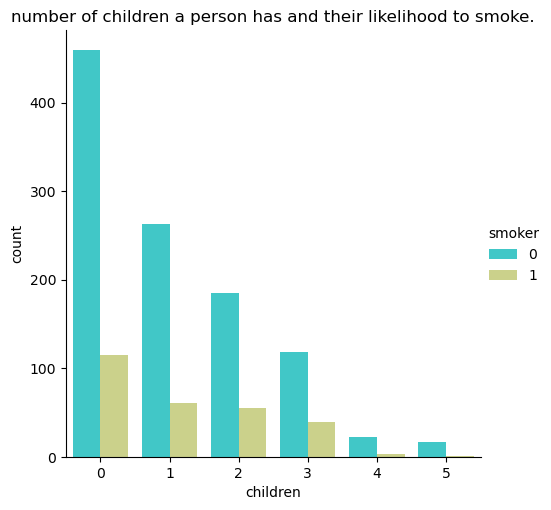

In [16]:
sns.catplot(x="children", kind="count", palette="rainbow",hue = "smoker",
            data=df)
plt.title('number of children a person has and their likelihood to smoke.')

Good to know that has one has more children they tend to stop smoking. which is a sign they are trying to be better people for their kids.

lets check whether there is any relation ship between region 

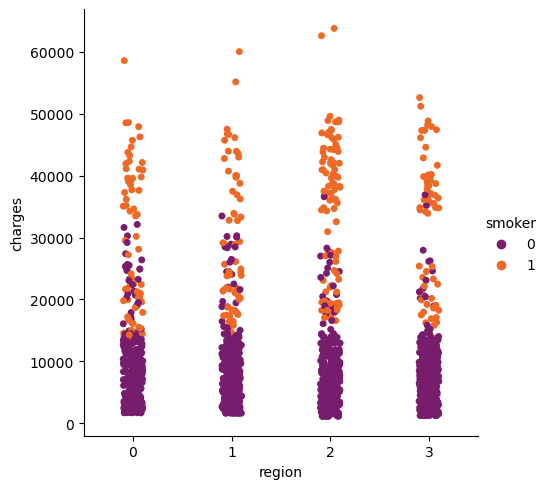

In [17]:
sns.catplot(df,x='region',y='charges',hue='smoker',palette='inferno')

there is no relationship between region and cost it's redundant 

## Lets Start Predicting the Cost of Treatment
we will start with simple linear regression.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [39]:
x = df.drop(['charges','WeightClass'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state = 1)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(f'training score: {lr.score(x_train,y_train)}\ntest score: {lr.score(x_test,y_test)}')

training score: 0.7529407271029183
test score: 0.7278115322804155


not bad for a simple implementation lets try using polynomial signs to the implementation.

In [41]:
X = df.drop(['charges','region','WeightClass'], axis = 1)
Y = df.charges


quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y,test_size=0.1, random_state = 1)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(f'training score: {plr.score(X_train,Y_train)}\ntest score: {plr.score(X_test,Y_test)}')

training score: 0.8440011689452862
test score: 0.8401397838466583


We can see significant improvement by implementing polynomial features

lets try the Random Forest Regressor 

In [48]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print(f'MSE train data: {mean_squared_error(y_train,forest_train_pred)}, MSE test data: {mean_squared_error(y_test,forest_test_pred)}')
print(f'R2 train data: {r2_score(y_train,forest_train_pred)}, R2 test data: {r2_score(y_test,forest_test_pred)}' )

MSE train data: 3329459.78722356, MSE test data: 23745873.621593084
R2 train data: 0.9770401321678733, R2 test data: 0.8497322420735931


We can see high accuracy in the training data but low a significant drop in test data this is due to overfitting 

### I believe Polynomial Features of 2 is a good model for the data 

Thank you